# MNIST dataset

## Kiểm tra môi trường code

In [45]:
import sys
sys.executable

'c:\\Users\\pc\\AppData\\Local\\Programs\\Python\\Python311\\python.exe'

## Nắm bài toán cần giải quyết

Cho dữ liệu quan sát được (dữ liệu huấn luyện): 
$$\{(\textbf{x}^{(1)}, y^{(1)}), ..., (\textbf{x}^{(N_{train})}, y^{(N_{train})})\}$$

Trong đó:

- $\textbf{x}^{(n)} \in \mathbb{R}^{784}$ là véc-tơ đầu vào chứa các giá trị pixel của một ảnh xám $28\times28$, ảnh này là ảnh một chữ số viết tay nào đó (véc-tơ $784$ chiều được tạo từ ảnh xám $28\times28$ bằng cách nối các dòng của ảnh xám lại với nhau)
- $y^{(n)} \in \{0, 1, ..., 9\}$ là đầu ra tương ứng, cho biết đây là chữ số nào

Nhiệm vụ ở đây là tìm ra một mô hình từ dữ liệu này sao cho mô hình này có thể nhận đầu vào là một ảnh-chữ-số-viết-tay *mới* (là một véc-tơ $\in \mathbb{R}^{784}$) và dự đoán đầu ra tương ứng (chữ số nào trong $\{0, 1, 2, ..., 9\}$) một cách *chính xác*.

## Import thư viện cần thiết

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import os 
plt.style.use('ggplot')

## Đọc dữ liệu

Bộ dữ liệu mà ta sẽ dùng trong bài này là MNIST - bộ dữ liệu chữ số viết tay "nổi tiếng" trong cộng đồng làm Machine Learning. [Bộ MNIST gốc](http://yann.lecun.com/exdb/mnist/) gồm có: dữ liệu huấn luyện (60000 ảnh) và dữ liệu kiểm tra (10000 ảnh). Bộ MNIST mà ta sẽ dùng trong bài này (file "mnist.pkl.gz") gồm có: dữ liệu huấn luyện (50000 ảnh), dữ liệu validation (10000 ảnh), và dữ liệu kiểm tra (10000 ảnh); dữ liệu huấn luyện và validation ở đây được tạo ra bằng cách tách ngẫu nhiên dữ luyện huấn luyện gốc ra thành 2 phần theo tỉ lệ 5:1. 

Về mặt ý nghĩa thì dữ liệu validation và dữ liệu kiểm tra đều là dữ liệu mới ngoài dữ liệu huấn luyện. Dữ liệu validation giống như đề thi thử, có thể được thi một vài lần; còn dữ liệu kiểm tra giống như đề thi thật, để đảm bảo kết quả được khách quan thì chỉ được thi một lần duy nhất! Khi làm Machine Learning, ta thường muốn thử một số cách tiền xử lý + mô hình để chọn ra cách tiền xử lý + mô hình tốt nhất. Với mỗi cách tiền xử lý + mô hình, ta sẽ huấn luyện trên dữ liệu huấn luyện và đo độ lỗi dự đoán trên dữ liệu validation; cuối cùng ta sẽ chọn cách tiền xử lý + mô hình mà có độ lỗi dự đoán thấp nhất trên dữ liệu validation (ta không chọn dựa vào độ lỗi dự đoán trên dữ liệu huấn luyện vì có thể xảy ra trường hợp "học vẹt": cách tiền xử lý + mô hình có độ lỗi rất thấp trên dữ liệu huấn luyện nhưng lại có độ lỗi cao với dữ liệu mới ngoài dữ liệu huấn luyện). Khi đã chọn xong cách tiền xử lý + mô hình rồi thì ta sẽ đo một lần duy nhất độ lỗi dự đoán trên dữ liệu kiểm tra để có một ước lượng khách quan về độ lỗi thật sự! Nếu bạn nhìn vào độ lỗi dự đoán trên dữ liệu kiểm tra và quay lại điều chỉnh cách tiền xử lý + mô hình thì kết quả trên dữ liệu kiểm tra sẽ không còn sự khách quan nữa!

Đoạn code dưới đây sẽ đọc dữ liệu từ file "mnist.pkl.gz" và lưu kết quả vào 6 mảng:

- `train_X`, `train_y`
- `val_X`, `val_y`
- `test_X`, `test_y`

In [2]:
def read_mnist(mnist_file):
    if os.path.isfile(mnist_file) == False:
        mnist_file = os.path.join(os.path.expanduser('~'), 'data', 'mnist.pkl.gz')
    
    f = gzip.open(mnist_file, 'rb')
    train_data, val_data, test_data = np.load(f, allow_pickle=True, encoding='latin1')
    f.close()
    
    train_X, train_Y = train_data
    val_X, val_Y = val_data
    test_X, test_Y = test_data    
    
    return train_X, train_Y, val_X, val_Y, test_X, test_Y

train_X, train_y, val_X, val_y, test_X, test_y = read_mnist('mnist.pkl.gz')
print(f'Shape of train_X: {train_X.shape}, shape of train_y: {train_y.shape}')
print(f'Shape of val_X:   {val_X.shape}, shape of val_y:   {val_y.shape}')
print(f'Shape of test_X:  {test_X.shape}, shape of test_y:  {test_y.shape}')

Shape of train_X: (50000, 784), shape of train_y: (50000,)
Shape of val_X:   (10000, 784), shape of val_y:   (10000,)
Shape of test_X:  (10000, 784), shape of test_y:  (10000,)


## Khám phá dữ liệu huấn luyện

In [3]:
print(f'Min of train_X: {train_X.min()}, max of train_X: {train_X.max()}')

Min of train_X: 0.0, max of train_X: 0.99609375


Với ảnh xám thì giá trị của mỗi pixel thường sẽ nằm trong đoạn [0, 255] (với 0 là màu đen và 255 là màu trắng), hoặc đôi khi được chuẩn hóa về đoạn [0, 1] (với 0 là màu đen và 1 là màu trắng). Ở đây có vẻ giá trị pixel của ảnh xám của ta nằm trong đoạn [0, 1].

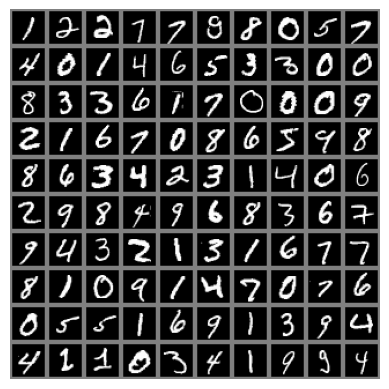

In [4]:
n_rimages = 10; n_cimages = 10 
padding = 2 
canvas = 0.5 * np.ones((n_rimages * (28 + 2 * padding), n_cimages * (28 + 2 * padding)))
rand_idxs = np.random.permutation(np.arange(len(train_X))[:n_rimages * n_cimages])
for r in range(n_rimages):
    for c in range(n_cimages):
        i = r * n_cimages + c
        image = train_X[rand_idxs[i]].reshape(28, 28)
        temp1 = r * (28 + 2 * padding) + padding 
        temp2 = c * (28 + 2 * padding) + padding 
        canvas[temp1:temp1 + 28, temp2:temp2 + 28] = image
plt.imshow(canvas, cmap='gray', vmin=0, vmax=1)
plt.grid(None)
plt.axis('off');

In [5]:
values, counts = np.unique(train_y, return_counts=True)
for value, count in zip(values, counts):
    print(f'Value: {value}, count: {count}')

Value: 0, count: 4932
Value: 1, count: 5678
Value: 2, count: 4968
Value: 3, count: 5101
Value: 4, count: 4859
Value: 5, count: 4506
Value: 6, count: 4951
Value: 7, count: 5175
Value: 8, count: 4842
Value: 9, count: 4988


Như vậy là `train_y` có 10 giá trị có thể có ứng với 10 chữ số từ 0 đến 9. Và số lượng ảnh của mỗi chữ số cũng khá tương đương nhau.

## Softmax Regression

### Tiền xử lí dữ liệu

In [6]:
def add_ones(X):
    return np.concatenate((np.ones((X.shape[0],1)), X), axis=1)

train_Z = add_ones(train_X)
train_Z.shape, train_Z

((50000, 785),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]))

### Tìm mô hình Softmax Regression từ dữ liệu huấn luyện

Ta sẽ tìm bộ trọng số của mô hình Softmax Regression bằng cách cực tiểu hóa độ lỗi cross-entropy trên dữ liệu huấn luyện:

$$
e(h_W(x),y)=-log(h_W(x)_y) \Leftrightarrow e(h_W(x),y) = - \sum_{j=1}^K onehot(y)_jlog(h_W(x)_j)
$$

Ở đây, ta không thể giải ra trực tiếp bộ trọng số như ở mô hình Linear Regression, mà cần phải dùng một thuật toán cực tiểu hóa mà ban đầu sẽ khởi tạo đại bộ trọng số, rồi sẽ thực hiện nhiều vòng lặp, ở mỗi vòng lặp sẽ cập nhật bộ trọng số một ít để làm giảm độ lỗi trên dữ liệu huấn luyện. Trong bài này, ta sẽ cài đặt một thuật toán cực tiểu hóa đơn giản là Gradient Descent. Theo đó thì ở mỗi vòng lặp, để tính gradient thì trước tiên ta sẽ cần tính các véc-tơ đầu ra của mô hình Softmax Regression ứng với các véc-tơ đầu vào của dữ liệu huấn luyện và bộ trọng số hiện tại.

Hàm `compute_smreg_output` dùng để tính các véc-tơ đầu ra của mô hình Softmax Regression; ta sẽ dùng hàm này trong quá trình huấn luyện mô hình Softmax Regression cũng như sau khi huấn huyện để dự đoán với các véc-tơ đầu vào mới. 

Hàm `compute_smreg_output` có các tham số đầu vào:
- `W`: mảng chứa các trọng số của mô hình Softmax Regression, mảng này có shape là `(d+1, K)` với `d` là số lượng phần tử của véc-tơ đầu vào (khi chưa thêm 1 ở đầu) và `K` là số lượng lớp; với dữ liệu cụ thể của ta thì `d` bằng 784 và `K` bằng 10  
- `X`: mảng chứa các véc-tơ đầu vào cần dự đoán, mảng này có shape là `(N, d+1)` với `N` là số lượng các véc-tơ đầu vào
- `return_prob`: nếu cờ này bằng `True` thì với mỗi véc-tơ đầu vào, ta sẽ trả về một véc-tơ đầu ra cho biết xác xuất của các lớp; nếu cờ này bằng `False` thì với mỗi véc-tơ đầu vào, ta sẽ trả về một giá trị đầu ra cho biết lớp mà có xác suất lớn nhất

Hàm `compute_smreg_output` sẽ trả về mảng chứa các véc-tơ đầu ra tương ứng với các véc-tơ đầu vào; nếu `return_prop` bằng True thì mảng trả về sẽ có shape `(N, K)`, còn nếu `return_prop` bằng `False` thì sẽ có shape `(N,)`.

In [7]:
def compute_smreg_output(W, X, return_prob=True):
    S = X@W
    E_S = np.exp(S)
    prob = E_S / E_S.sum(axis=1, keepdims=True)
    if return_prob:
        return prob
    return np.argmax(prob, axis=1)

Hàm `train_smreg` có các tham số đầu vào:
- `X`: mảng chứa các véc-tơ đầu vào (đã được thêm 1 ở đầu) của dữ liệu huấn luyện, mảng này có shape là `(N, d+1)` với `N` là số lượng véc-tơ đầu vào của dữ liệu huấn luyện và `d` là số lượng phần tử của mỗi véc-tơ đầu vào (khi chưa thêm 1 ở đầu)
- `y`: mảng chứa các đầu ra tương ứng với các véc-tơ đầu vào của dữ liệu huấn luyện, mảng này có shape là `(N,)`
- `lr`: số thực > 0 cho biết hệ số học (learning rate) của thuật toán Gradient Descent
- `max_epoch`: số nguyên > 0 cho biết số vòng lặp tối đa của thuật toán Gradient Descent (ví dụ, nếu `max_epoch` bằng 10 thì ta sẽ chạy Gradient Descent với 10 vòng lặp)
- `initial_W`: mảng chứa các trọng số khởi tạo của mô hình Softmax Regression (ta sẽ chạy Gradient Descent từ các trọng số khởi tạo này), mảng này có shape là `(d+1, K)` với `K` là số lượng các lớp (với dữ liệu cụ thể của ta thì `K` bằng 10); nếu `initial_W` bằng `None` thì trong hàm `train_smreg` ta sẽ khởi tạo các trọng số của mô hình Softmax Regression với giá trị là 0 (với mô hình Softmax Regression thì ta khởi tạo như thế nào cũng được, ở đây ta thống nhất là khởi tạo với giá trị là 0 để thầy và trò sẽ ra cùng kết quả)

Hàm `train_smreg` trả về:
- Mảng chứa các trọng số tìm được của mô hình Softmax Regression, mảng này có shape là `(d+1, K)`
- List chứa độ lỗi cross-entropy trên dữ liệu huấn luyện sau mỗi vòng lặp, list này gồm có `max_epoch` phần tử. Bạn xem công thức tính độ lỗi cross-entropy trên dữ liệu huấn luyện ở trang 6 của slide "HW2-Slide.pdf"

Trong hàm `train_smreg` thì bước khó nhất là bước tính gradient. Công thức tính gradient:
$$
\nabla E_{train}(W) = \frac{1}{N}\sum_{n=1}^{N} x^{(n)}(h_W(x^{(n)})-onehot(y^{(n)}))^T
$$

In [8]:
def one_hot(y):
    return np.eye(10)[y]

def train_smreg(X, y, lr, max_epoch, initial_W=None):
    y_one_hot = one_hot(y)
    train_ces = []
    W = np.zeros((X.shape[1], y_one_hot.shape[1])) if initial_W is None else initial_W
    predicted_Y = compute_smreg_output(W, X)

    while max_epoch:
        grad = (X.T @ (predicted_Y - y_one_hot)) / X.shape[0]
        W -= lr * grad
        predicted_Y = compute_smreg_output(W, X)
        train_ces.append(-((y_one_hot*np.log(predicted_Y)).sum())/y_one_hot.shape[0])
        max_epoch -= 1
    return W, train_ces

Tiếp theo, ta sẽ cần chọn ra giá trị `lr` (learning rate) phù hợp để việc cực tiểu hóa của thuật toán Gradient Descent diễn ra một cách tốt đẹp. Để đỡ tốn thời gian, ta sẽ chia ra làm 2 giai đoạn. Ở giai đoạn đầu, ta sẽ gọi hàm `train_smreg` với `max_epoch` vừa vừa (100) và thử với các giá trị `lr`khác nhau (0.03, 0.3, 3). Sau khi quan sát kết quả, ta sẽ chọn ra giá trị `lr` phù hợp nhất, rồi qua giai đoạn 2: gọi tiếp hàm `train_smreg` với giá trị `lr` này và bộ trọng số tìm được trước đó và `max_epoch` lớn (400). Ta sẽ gọi bộ trọng số tìm được sau cùng là `W_1` (vì lúc sau ta sẽ thử một cách tiền xử lý + mô hình Softmax Regression khác, và ta sẽ gọi bộ trọng số tìm được là `W_2`).

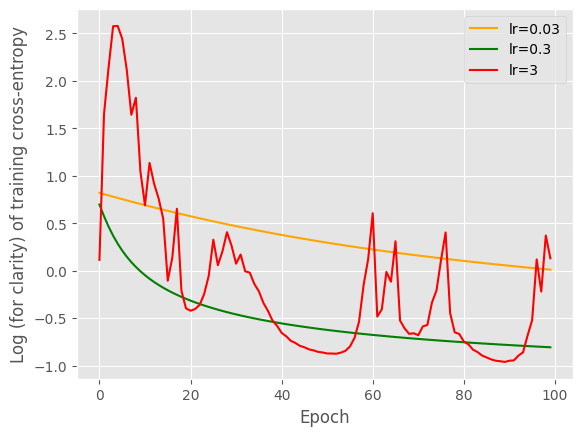

In [9]:
W_1a, train_ces_1a = train_smreg(train_Z, train_y, lr=0.03, max_epoch=100)
W_1b, train_ces_1b = train_smreg(train_Z, train_y, lr=0.3, max_epoch=100)
W_1c, train_ces_1c = train_smreg(train_Z, train_y, lr=3, max_epoch=100)

plt.plot(np.log(train_ces_1a), label='lr=0.03', color='orange')
plt.plot(np.log(train_ces_1b), label='lr=0.3', color='green')
plt.plot(np.log(train_ces_1c), label='lr=3', color='red')
plt.xlabel('Epoch')
plt.ylabel('Log (for clarity) of training cross-entropy')
plt.legend();

- Đối với `lr = 3`:
    - Cross Entropy dao động mạnh và không ổn định qua các epoch. 
    - Có thể thấy, đối với lr = 3 mô hình đã đi qua và dao động quanh điểm tối ưu, vì vậy không thể ổn định đến kết quả tốt nhất.
    - Hiện tượng này xảy ra là do learning rate cao, dẫn đến mô hình bị dao động mạnh và khó hội tụ đến điểm tối ưu. 

- Đối với `lr = 0.3`:
    - Cross Entropy giảm dần một cách ổn định qua các epoch. 
    - Có thể thấy, đây là một giá trị learning rate phù hợp cho mô hình.
    - Learning rate phù hợp dẫn đến việc giá trị của hàm loss Cross Entropy giảm với tốc độ nhanh hơn nhưng giảm một cách ổn định.

- Đối với `lr = 0.03`:
    - Cross Entropy giảm dần một cách ổn định qua các epoch. 
    - Vì learning rate khá thấp, dẫn giá trị Cross Entropy giảm một cách khá chậm chạp, cần nhiều thời gian hơn để đạt được điểm tối ưu.

Có thể thấy `lr=0.3` là giá trị phù hợp nhất. Tiếp theo, ta sẽ qua giai đoạn 2. 

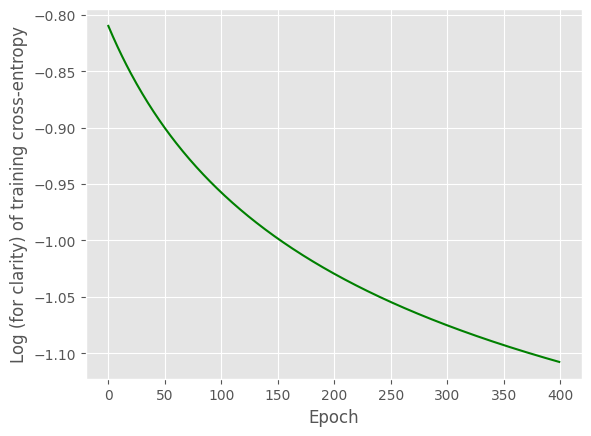

In [10]:
W_1, train_ces = train_smreg(train_Z, train_y, lr=0.3, max_epoch=400, initial_W=W_1b)

plt.plot(np.log(train_ces), color='green')
plt.xlabel('Epoch')
plt.ylabel('Log (for clarity) of training cross-entropy');

### Dùng mô hình Softmax Regression tìm được để dự đoán với dữ liệu huấn luyện và đánh giá kết quả

In [11]:
predicted_train_y = compute_smreg_output(W_1, train_Z, return_prob=False)

Hàm `compute_mbe` để tính độ lỗi MBE - Mean Binary Error; độ lỗi này là một số thực từ 0 đến 100 cho biết tỉ lệ phần trăm các mẫu bị dự đoán sai (độ lỗi cross-entropy giúp dễ cực tiểu hóa hơn trong quá trình huấn luyện, nhưng khi đánh giá thì độ lỗi MBE sẽ giúp con người dễ cảm nhận hơn).

Hàm này nhận vào các tham số:
- `predicted_y`: mảng chứa các đầu ra dự đoán, có shape là `(N,)`
- `y`: mảng chứa các đầu ra đúng, cũng có shape là `(N,)`

Hàm này trả về: số thực từ 0 đến 100 cho biết độ lỗi MBE giữa `predicted_y` và `y`.

In [12]:
def  compute_mbe(predicted_Y, Y):
    return (predicted_Y != Y).mean()*100

train_mbe = compute_mbe(predicted_train_y, train_y)
train_mbe

9.192

### Tiền xử lý dữ liệu validation, dùng mô hình Softmax Regression tìm được để dự đoán với dữ liệu validation và đánh giá kết quả

In [13]:
val_Z = add_ones(val_X)
predicted_val_y = compute_smreg_output(W_1, val_Z, return_prob=False)
val_mbe = compute_mbe(predicted_val_y, val_y)
val_mbe

8.36

## Cải tiến 1: Thêm đặc trưng cho dữ liệu đầu vào

Ta thấy hiện giờ mô hình Softmax Regression tìm được của ta có độ lỗi khá cao trên cả dữ liệu huấn luyện lẫn dữ liệu validation. Nếu ta có thể làm giảm độ lỗi trên dữ liệu huấn luyện thì có khả năng độ lỗi trên dữ liệu validation cũng sẽ giảm theo. Một cách để làm giảm độ lỗi trên dữ liệu huấn luyện là tăng thêm số lượng vòng lặp của thuật toán Gradient Descent. Tuy nhiên, sau cùng thì mô hình Softmax Regression vẫn là một mô hình đơn giản. Do đó, ở đây, mình muốn đưa ra một cách khác mà có thể giúp làm giảm độ lỗi trên dữ liệu huấn luyện của mô hình Softmax Regression - một mô hình đơn giản. 

Suy nghĩ để thiết kế ra véc-tơ đầu vào $\textbf{z}$ thay cho véc-tơ đầu vào $\textbf{x}$ sao cho véc-tơ đầu vào $\textbf{z}$ sẽ giúp mô hình Softmax Regression dự đoán đầu ra $y$ tốt hơn hơn so với véc-tơ đầu vào $\textbf{x}$. Cụ thể ở đây, ta sẽ thử một cách thiết kế đơn giản cho véc-tơ đầu vào $\textbf{z}$: $\textbf{z}$ là $\textbf{x}$ (chứa các giá trị pixel) được bổ sung thêm 2 đặc trưng là "intensity" và "symmetry".

- "intensity" của một ảnh cho biết giá trị pixel trung bình của ảnh; đặc trưng này có thể giúp ích cho việc phân tách giữa các chữ số vì có các chữ số có ít đường nét ("intensity" thấp) và có các chữ số có nhiều đường nét ("intensity" cao) 
- "symmetry" của ảnh cho biết mức độ đối xứng của ảnh; đặc trưng này cũng có thể giúp ích cho việc phân tách giữa các chữ số vì có các chữ số có mức độ đối xứng thấp và có các chữ số có mức độ đối xứng cao. Cụ thể, "symmetry" của ảnh được tính như sau:
    - Lấy ảnh trừ đi ảnh lật theo chiều ngang, lấy trị tuyệt đối, rồi tính trung bình. Gọi kết quả tính được là s1
    - Lấy ảnh trừ đi ảnh lật theo chiều dọc, lấy trị tuyệt đối, rồi tính trung bình. Gọi kết quả tính được là s2
    - symmetry = - (s1 + s2) / 2

### Tiền xử lý dữ liệu huấn luyện

Ta sẽ tiền xử lý `train_X` bằng cách thêm vào cuối `train_X` 2 cột ứng với 2 đặc trưng đã mô tả ở trên là "intensity" và "symmetry". Ta cũng sẽ chuẩn hóa để đưa các giá trị của 2 cột này về đoạn [0, 1] bằng cách: lấy mỗi cột trừ cho min-của -cột rồi chia cho (max-của-cột trừ cho min-của-cột); ở đây, max-của-cột và min-của-cột là max và min của cột ban đầu khi chưa đụng chạm gì cả. Ta chuẩn hóa như này để miền giá trị của 2 cột này tương tự với miền giá trị của các cột trước đó (chứa các giá trị pixel) của `train_X`; việc các cột có miền giá trị tương tự nhau thường sẽ giúp cho thuật toán Gradient Descent hội tụ nhanh hơn. Sau khi đã thêm 2 cột "intensity" và "symmetry" (đã chuẩn hóa) vào cuối `train_X` thì ta sẽ thêm cột 1 vào đầu `train_X`.

Hàm `add_features` để thêm 2 cột "intensity" và "symmetry" (đã chuẩn hóa). 

Hàm này có các tham số đầu vào:
- `X`: mảng chứa các véc-tơ đầu vào (chưa thêm 1 ở đầu), mảng này có shape là `(N, d)` với `N` là số lượng các véc-tơ đầu vào và `d` là số lượng phần tử của mỗi véc-tơ đầu vào 
- `mins` và `maxs`: 2 mảng chứa min và max của 2 cột "intensity" và "symmetry" (khi chưa chuẩn hóa) của *dữ liệu huấn luyện*, mỗi mảng có shape là `(2,)`. Khi gọi hàm này với dữ liệu huấn luyện thì `mins` và `maxs` sẽ bằng `None`, và bên trong hàm sẽ tính `mins` và `maxs` từ dữ liệu huấn luyện, và dùng `mins` và `maxs` này để chuẩn hóa. Khi gọi hàm này với dữ liệu mới ngoài dữ liệu huấn luyện thì cách làm chuẩn là sẽ truyền vào `mins` và `maxs` được tính từ *dữ liệu huấn luyện*, và dùng `mins` và `maxs` này để chuẩn hóa

Hàm này trả về: mảng `X` được thêm vào cuối 2 cột là "intensity" và "symmetry" (2 cột này đã được chuẩn hóa về [0, 1]), mảng kết quả này có shape là `(N, d+2)`; nếu `mins` và `maxs` truyền vào bằng None thì: ngoài mảng `X` được thêm vào cuối 2 cột mới, còn trả về thêm `mins` và `maxs` được tính từ dữ liệu (`mins` và `maxs` là mảng có shape là `(2,)`).

In [14]:
def add_features(X, mins=None, maxs=None):
    intensity = X.mean(axis=1)
    X_images = X.reshape(X.shape[0], int(np.sqrt(X.shape[1])), -1)
    s1 = np.abs(X_images - X_images[:, :, ::-1]).mean(axis=(1,2))
    s2 = np.abs(X_images - X_images[:, ::-1, :]).mean(axis=(1,2))
    symetry = - (s1 + s2)/2
    flag = 0
    if mins is None and maxs is None:
        mins = np.array([intensity.min(), symetry.min()])
        maxs = np.array([intensity.max(), symetry.max()])
        flag = 1
    intensity = (intensity - mins[0])/(maxs[0] - mins[0])
    symetry = (symetry - mins[1])/(maxs[1] - mins[1])
    Z = np.concatenate((X, intensity.reshape(-1,1), symetry.reshape(-1,1)), axis=1)
    if flag:
        return Z, mins, maxs
    return Z

In [15]:
train_Z, mins_for_add_features, maxs_for_add_features = add_features(train_X)
train_Z = add_ones(train_Z)
train_Z.shape

(50000, 787)

### Tìm mô hình Softmax Regression từ dữ liệu huấn luyện

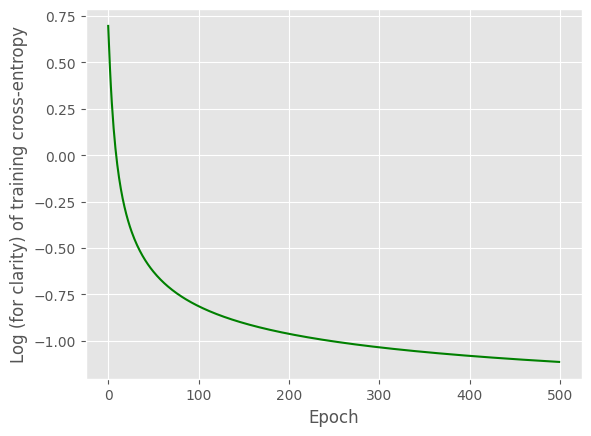

In [16]:
W_2, train_ces = train_smreg(train_Z, train_y, lr=0.3, max_epoch=500)

plt.plot(np.log(train_ces), color='green')
plt.xlabel('Epoch')
plt.ylabel('Log (for clarity) of training cross-entropy');

### Dùng mô hình Softmax Regression tìm được để dự đoán với dữ liệu huấn luyện và đánh giá kết quả

In [17]:
predicted_train_y = compute_smreg_output(W_2, train_Z, return_prob=False)
train_mbe = compute_mbe(predicted_train_y, train_y)
train_mbe

9.116

Như vậy là độ lỗi MBE trên dữ liệu huấn luyện giảm từ 9.192 xướng 9.116. Giảm không đáng kể (chắc là do cách thiết kế véc-tơ đầu vào $\textbf{z}$ của ta còn đơn giản), nhưng dù sao cũng có giảm ...

### Tiền xử lý dữ liệu validation, dùng mô hình Softmax Regression tìm được để dự đoán với dữ liệu validation và đánh giá kết quả

In [18]:
val_Z = add_ones(add_features(val_X, mins_for_add_features, maxs_for_add_features))
predicted_val_y = compute_smreg_output(W_2, val_Z, return_prob=False)
val_mbe = compute_mbe(predicted_val_y, val_y)
val_mbe

8.27

Độ lỗi MBE trên dữ liệu validation cũng giảm theo: giảm từ 8.36 xuống 8.27.

## Cải tiến 2: Stochastic Gradient Descent (SGD)

Ở phần cải tiến 1, mình đã có nói về 2 ý tưởng mà có thể giúp làm giảm độ lỗi trên dữ liệu huấn luyện với hy vọng là khi độ lỗi trên dữ liệu huấn luyện giảm xuống thì độ lỗi trên dữ liệu mới ngoài dữ liệu huấn luyện cũng sẽ giảm theo.

- Ý tưởng 1 (liên quan đến việc huấn luyện mô hình Softmax Regression): Thực hiện tốt hơn nữa việc cực tiểu hóa độ lỗi trên dữ liệu huấn luyện của mô hình Softmax Regression
- Ý tưởng 2 (liên quan đến việc tiền xử lý): Suy nghĩ để đưa ra véc-tơ đầu vào $\textbf{z}$ thay cho véc-tơ đầu vào $\textbf{x}$ sao cho $\textbf{z}$ sẽ giúp mô hình Softmax Regression --- một mô hình có "đầu óc đơn giản" --- dự đoán đầu ra $y$ dễ hơn so với $\textbf{x}$

Ở cải tiến 1, với ý tưởng 1 thì mình mới chỉ nói một cách là nói máy tính cố chịu đựng và tăng thêm số lượng vòng lặp của thuật toán Gradient Descent :-(. Với ý tưởng 2 thì mình đã đưa ra một cách đơn giản: $\textbf{z}$ sẽ là $\textbf{x}$ (chứa các giá trị pixel) được bổ sung thêm 2 đặc trưng là "intensity" và "symmetry"; bạn cũng đã cài đặt cách đơn giản này và kết quả cho thấy độ lỗi được cải thiện, dù không ấn tượng gì mấy.

Đầu tiên ta sẽ làm với ý tưởng 1. Cụ thể thì ta sẽ thử cài đặt một cải tiến đơn giản của thuật toán Gradient Descent (GD) gọi là Stochastic Gradient Descent (SGD) mà có thể giúp tăng tốc một cách đáng kể; từ đó, với cùng một khoảng thời gian, SGD có thể giúp đạt được độ lỗi trên dữ liệu huấn luyện nhỏ hơn nhiều so với GD. Độ lỗi trên dữ liệu huấn luyện mà cần cực tiểu hóa của một mô hình machine learning thường có dạng trung bình của độ lỗi của một mẫu dữ liệu huấn luyện $(\textbf{x}, y)$. Do đó, gradient (các đạo hàm riêng) của độ lỗi trên dữ liệu huấn luyện theo bộ trọng số sẽ có dạng trung bình của gradient của độ lỗi của một mẫu dữ liệu huấn luyện. Nghĩa là, ở mỗi lần cập nhật trọng số, để tính gradient của độ lỗi trên dữ liệu huấn luyện, GD sẽ phải duyệt qua tất cả các mẫu dữ liệu huấn luyện, với mỗi mẫu tính gradient, rồi cuối cùng lấy trung bình lại. Do đó, nếu có nhiều mẫu dữ liệu huấn luyện thì GD sẽ chạy chậm. SGD tăng tốc bằng cách: dùng gradient trung bình trên một mini-batch --- một tập con ngẫu nhiên các mẫu dữ liệu huấn luyện --- để xấp xỉ gradient trung bình trên toàn bộ các mẫu dữ liệu huấn luyện. 

Cụ thể, SGD thường được cài đặt như sau:

===

Với mỗi epoch (một epoch ám chỉ một lần duyệt qua toàn bộ các mẫu dữ liệu huấn luyện):
- Xáo trộn ngẫu nhiên các mẫu dữ liệu huấn luyện
- Chia các mẫu dữ liệu huấn luyện ra thành các mini-batch có kích thước bằng nhau (kích thước này do người dùng chỉ định). Với mỗi mini-batch:
    - Tính gradient trung bình trên mini-batch
    - Cập nhật trọng số: trọng số mới = trọng số cũ - learning rate * gradient

===

Giả sử ta có 100 mẫu dữ liệu huấn luyện và kích thước của mini-batch là 20. Với một epoch (một lần duyệt qua toàn bộ các mẫu dữ liệu huấn luyện), GD chỉ đi được một bước (tức một lần cập nhật trọng số), còn SGD sẽ đi được 100/20 = 5 bước. Mặc dù chất lượng một bước đi của SGD không bằng GD nhưng khi chạy SGD và GD trong thực tế thì người ta thấy số lượng hơn chất lượng: sau một epoch, độ lỗi của SGD thường thấp hơn nhiều so với độ lỗi của GD! 

Dưới đây, khi làm với ý tưởng 1 (thay GD bằng SGD) thì ta sẽ giữ nguyên véc-tơ đầu vào $\textbf{x}$, chỉ tiền xử lý là thêm 1 ở đầu.

- Thuật toán Gradient Descent (GD):

$$
\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla E_{train}(\mathbf{w})
$$

$$
\nabla E_{train}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^{N} \nabla e \left( h_{\mathbf{w}} (\mathbf{x}^{(n)}), y^{(n)} \right)
$$

Để thực hiện một bước cập nhật, GD cần phải duyệt qua toàn bộ $N$ mẫu huấn luyện  
→ **Chậm khi $N$ lớn** (hiển thị màu đỏ)


- **Phác thảo thuật toán SGD:**

1. Khởi tạo $\mathbf{w}$
2. Lặp lại cho đến khi thỏa mãn tiêu chí dừng:
   a. Xáo trộn thứ tự các mẫu huấn luyện  
   b. Với mỗi mini-batch $b = 1, \dots, \frac{N}{B}$:

$$
\mathbf{w} \leftarrow \mathbf{w} - \alpha \frac{1}{B} \sum_{n=(b-1)B+1}^{bB} \nabla e \left( h_{\mathbf{w}} (\mathbf{x}^{(n)}), y^{(n)} \right)
$$

### Tiền xử lý dữ liệu huấn luyện

In [19]:
train_Z = add_ones(train_X)
train_Z.shape

(50000, 785)

### Tìm mô hình Softmax Regression từ dữ liệu huấn luyện

Hàm `train_smreg` để huấn luyện mô hình Softmax Regression bằng thuật toán SGD (mình đã mô tả mã giả của thuật toán SGD ở bên trên, bạn được phép dùng vòng lặp để duyệt từng epoch cũng như để duyệt từng mini-batch).

Hàm `train_smreg` có các tham số đầu vào:
- `X`, `y`, `lr`, `max_epoch`, `initial_W`: giống như ở HW2, mình sẽ không nhắc lại nữa
- `mb_size`: số nguyên thuộc đoạn [1, số-lượng-mẫu-dữ-liệu-huấn-luyện] cho biết kích thước của mini-batch; nếu `mb_size` bằng số lượng mẫu dữ liệu huấn luyện thì SGD sẽ trở thành GD!
- `wanted_mbe`: số thực thuộc đoạn [0, 100] cho biết độ lỗi MBE trên dữ liệu huấn luyện mà ta muốn đạt tới; ta sẽ dừng SGD khi số lượng epoch bằng `max_epoch` hoặc độ lỗi MBE trên dữ liệu huấn luyện (được tính sau mỗi epoch) nhỏ hơn hoặc bằng `wanted_mbe`; ở bài này, ta dùng tham số này để so sánh GD và SGD: với cùng một giá trị `wanted_mbe`, ta sẽ so sánh thời gian chạy của GD và SGD (còn nếu ta so sánh GD và SGD bằng cách so sánh độ lỗi của GD và SGD với cùng `max_epoch` thì có thể sẽ không được công bằng cho lắm, vì một epoch của SGD có vẻ sẽ tốn nhiều thời gian hơn so với một epoch của GD)

Hàm `train_smreg` trả về 2 thứ như ở HW2: mảng chứa các trọng số tìm được của mô hình Softmax Regression, và list chứa độ lỗi cross-entropy trên dữ liệu huấn luyện sau mỗi epoch.

In [20]:
def train_smreg(X, y, initial_W, mb_size, lr, max_epoch, wanted_mbe):
    np.random.seed(0)
    y_one_hot = one_hot(y)
    train_ces = []
    W = np.zeros((X.shape[1], y_one_hot.shape[1])) if initial_W is None else initial_W
    random_index = np.arange(X.shape[0])

    while max_epoch:
        np.random.shuffle(random_index)
        for i in range(int(X.shape[0]/mb_size)):
            mb_index = random_index[i*mb_size: (i+1)*mb_size]
            X_mb, y_mb = X[mb_index], y_one_hot[mb_index]
            predicted_Y_mb = compute_smreg_output(W, X_mb)
            grad = (X_mb.T @ (predicted_Y_mb - y_mb)) / X_mb.shape[0]
            W -= lr * grad
        epoch_predicted_Y = compute_smreg_output(W, X)
        train_ces.append(-((y_one_hot*np.log(epoch_predicted_Y)).sum())/y_one_hot.shape[0])
        if compute_mbe(np.argmax(epoch_predicted_Y, axis=1), y) <= wanted_mbe: 
             return W, train_ces
        max_epoch -= 1
    return W, train_ces

Đầu tiên, ta sẽ so sánh GD và SGD bằng cách: cho `wanted_mbe` bằng 10 (còn `max_epoch` thì thật lớn) và so sánh thời gian chạy của hàm `train_smreg` với `mb_size` bằng `len(train_Z)` (GD) và thời gian chạy của hàm `train_smreg` với `mb_size` bằng 32 (SGD). Với GD thì ta dùng `lr` bằng 0.3 (`lr` tốt nhất trong 3 giá trị [0.03, 0.3, 3] mà ta đã thử ở trước), với SGD thì ta sẽ dùng `lr` bằng 0.03 (mình có thử `lr` bằng 0.3 thì thấy độ lỗi của SGD lúc lên lúc xuống nên mình hạ xuống 0.03 và thấy mọi chuyện diễn ra tốt đẹp, mình nghĩ việc SGD có `lr`-phù-hợp thấp hơn `GD` cũng hợp lý, vì chất lượng một bước đi của SGD không bằng GD). Ngoài ra, để nhanh chóng đo thời gian chạy của một cell thì ta sẽ dùng câu lệnh magic `%%time` của Jupyter Notebook ở đầu cell. 

CPU times: total: 8min 31s
Wall time: 1min 23s


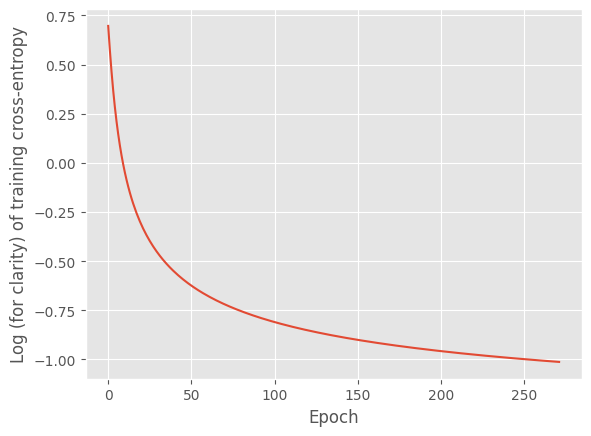

In [21]:
%%time
W_3a, train_ces = train_smreg(
    train_Z, train_y, 
    initial_W=None, mb_size=len(train_Z), lr=0.3, max_epoch=1000, wanted_mbe=10)

plt.plot(np.log(train_ces))
plt.xlabel('Epoch')
plt.ylabel('Log (for clarity) of training cross-entropy');

GD mất gần 300 epoch ... Bên máy mình mất hơn 1 phút.

Bây giờ ta hãy xem SGD.

CPU times: total: 1.94 s
Wall time: 559 ms


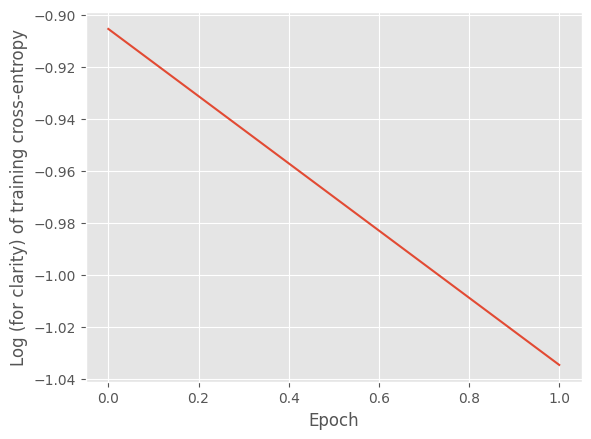

In [22]:
%%time
W_3b, train_ces = train_smreg(
    train_Z, train_y, 
    initial_W=None, mb_size=32, lr=0.03, max_epoch=1000, wanted_mbe=10)

plt.plot(np.log(train_ces))
plt.xlabel('Epoch')
plt.ylabel('Log (for clarity) of training cross-entropy');

SGD chỉ tốn 2 epoch! Bên máy mình chạy chưa đến 1 giây!

Bây giờ ta đã hoàn toàn bị thuyết phục là SGD tốt hơn nhiều so với GD (ít nhất là với dữ liệu mà ta đang làm, khi mà số lượng mẫu dữ liệu huấn luyện tương đối lớn). Tiếp theo, ta sẽ chạy tiếp SGD từ bộ trọng số đã tìm được trước đó với `max_epoch` bằng 98 (kết hợp với 2 epoch trước đó thì tổng cộng sẽ là 100 epoch), còn `wanted_mbe` thì ta sẽ cho bằng 0 để SGD sẽ bị ngắt bởi `max_epoch` trước.

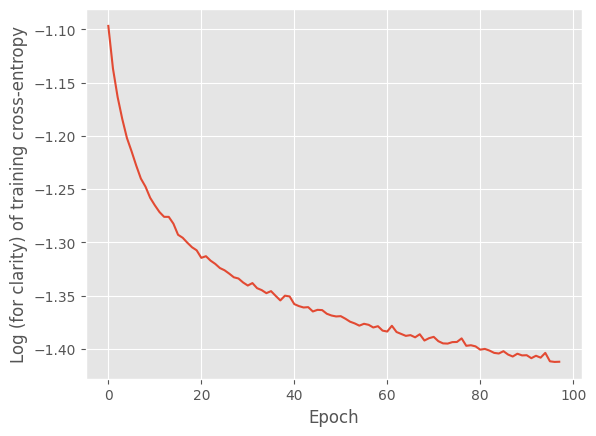

In [23]:
W_3, train_ces = train_smreg(
    train_Z, train_y, 
    initial_W=W_3b, mb_size=32, lr=0.03, max_epoch=98, wanted_mbe=0)

plt.plot(np.log(train_ces))
plt.xlabel('Epoch')
plt.ylabel('Log (for clarity) of training cross-entropy');

Mình có chạy thử thêm mấy trăm epoch nữa thì thấy độ lỗi vẫn tiếp tục giảm nhưng không nhiều. Do đó, mình nghĩ trong bài này thì có thể dừng ở đây và cho rằng việc cực tiểu hóa độ lỗi trên dữ liệu huấn luyện của mô hình Softmax Regression đã khá ổn.

### Dùng mô hình Softmax Regression tìm được để dự đoán với dữ liệu huấn luyện và đánh giá kết quả

In [24]:
predicted_train_y = compute_smreg_output(W_3, train_Z, return_prob=False)
train_mbe = compute_mbe(predicted_train_y, train_y)
train_mbe

6.744

Ở phần trước, khi dùng GD, độ lỗi MBE trên dữ liệu huấn luyện chỉ được 9.x% (mặc dù máy tính của ta cũng đã phải chạy khá vật vả với 500 epoch). Với SGD, chỉ với 100 epoch, ta đã đạt được độ lỗi 6.x%!

### Tiền xử lý dữ liệu validation, dùng mô hình Softmax Regression tìm được để dự đoán với dữ liệu validation và đánh giá kết quả

In [25]:
val_Z = add_ones(val_X)
predicted_val_y = compute_smreg_output(W_3, val_Z, return_prob=False)
val_mbe = compute_mbe(predicted_val_y, val_y)
val_mbe

7.03

Độ lỗi MBE trên dữ liệu validation cũng giảm theo: từ 8.x% xuống 7.x%!

## Cải tiến 3: Hiệu chỉnh độ nghiêng của ảnh chữ số (Deslanting digit image)

Đến đây, ta đã khai thác khá triệt để ý tưởng 1: việc cực tiểu hóa độ lỗi trên dữ liệu huấn luyện của mô hình Softmax Regression đã khá ổn. Để có thể cải tiến hơn nữa thì ta sẽ qua ý tưởng 2: suy nghĩ để đưa ra véc-tơ đầu vào $\textbf{z}$ thay cho véc-tơ đầu vào $\textbf{x}$ sao cho $\textbf{z}$ sẽ giúp mô hình Softmax Regression --- một mô hình có "đầu óc đơn giản" --- dự đoán đầu ra $y$ dễ hơn so với $\textbf{x}$. Có thể nói là ý tưởng 2 này gần như là không có giới hạn, ta luôn luôn có thể khai thác hơn nữa ý tưởng 2 này, và khi khai thác tốt thì ta sẽ có một mô hình nhẹ, đơn giản, nhưng lại có độ chính xác dự đoán cao!

Đầu tiên, ta hãy quan sát các ảnh của một chữ số nào đó, chẳng hạn chữ số 8.


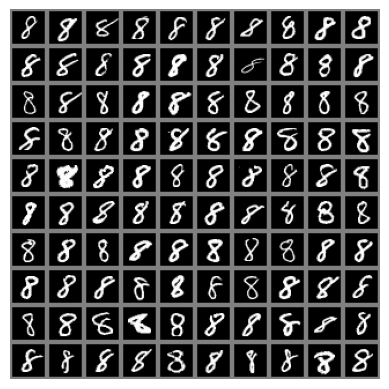

In [26]:
X = train_X[train_y == 8] 
n_rimages = 10; n_cimages = 10 
padding = 2 
canvas = 0.5 * np.ones((n_rimages * (28 + 2 * padding), n_cimages * (28 + 2 * padding)))
rand_idxs = np.random.permutation(np.arange(len(train_X))[:n_rimages * n_cimages])
for r in range(n_rimages):
    for c in range(n_cimages):
        i = r * n_cimages + c
        image = X[rand_idxs[i]].reshape(28, 28)
        temp1 = r * (28 + 2 * padding) + padding 
        temp2 = c * (28 + 2 * padding) + padding 
        canvas[temp1:temp1 + 28, temp2:temp2 + 28] = image
plt.imshow(canvas, cmap='gray', vmin=0, vmax=1)
plt.axis('off');

Ta thấy một yếu tố làm cho các ảnh chữ số 8 khác nhau là độ nghiêng (khi viết, có người theo phong cách viết đứng, có người viết nghiêng ít, có người viết nghiêng nhiều, ...). Điều này cũng đúng cho các ảnh của các chữ số khác. Nếu ta dùng véc-tơ đầu vào $\textbf{z}$ là ảnh đã được loại bỏ độ nghiêng (tức viết đứng) thay cho véc-tơ đầu vào $\textbf{x}$ là ảnh ban đầu thì có thể sẽ giúp mô hình Softmax Regression dễ dàng hơn trong việc dự đoán đây là chữ số nào.

Từ ảnh ban đầu, làm sao để tạo ra ảnh được loại bỏ độ nghiêng? Ý tưởng thực hiện được phác họa ở hình bên dưới. 

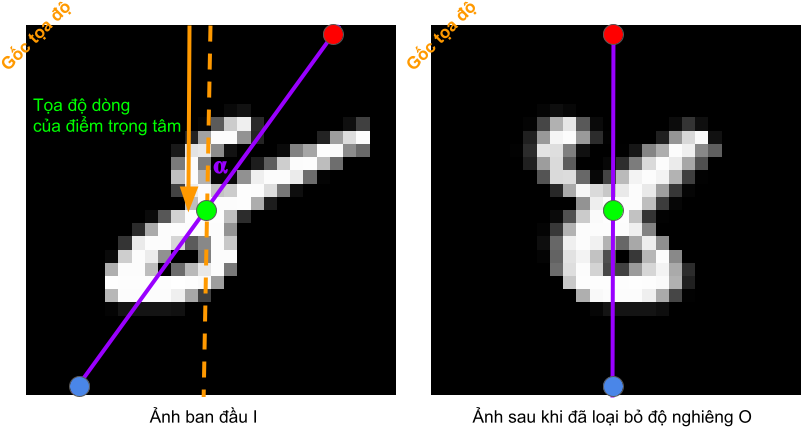

Đầu tiên, từ ảnh ban đầu, ta sẽ tìm đường thẳng thể hiện cho độ nghiêng của chữ số (đường màu tím) và điểm trọng tâm của chữ số (điểm màu xanh lá). Kế tiếp, ta sẽ thay đổi tọa độ cột của các pixel (còn tọa độ dòng thì giữ nguyên) sao cho: đường thẳng thể hiện độ nghiêng của chữ số sẽ không còn nghiêng nữa, còn tọa độ của điểm trọng tâm của chữ số thì vẫn sẽ được giữ nguyên (để bạn dễ hình dung sự thay đổi, ngoài điểm trọng tâm màu xanh lá, mình có vẽ thêm điểm màu đỏ và điểm màu xanh dương). Nếu gọi `O` là ma trận pixel của ảnh sau khi đã loại bỏ độ nghiêng và `I` là ma trận pixel của ảnh ban đầu thì câu hỏi đặt ra là: `O[r, c] = I[r, ?]` (ở đây `r` và `c` là tọa độ dòng và cột của một pixel trong ảnh sau khi đã loại bỏ độ nghiêng). Quan sát sự thay đổi của 3 điểm màu đỏ, xanh lá cây, xanh dương thì ta có thể thấy rằng: \
`O[r, c] = I[r, ic]` \
với `ic = c + (tọa-độ-dòng-của-điểm-trọng-tâm - r)*tan-của-alpha` \
(alpha là góc hợp bởi đường thẳng thể hiện độ nghiêng với phương thẳng đứng)\
Nếu bạn chưa hiểu công thức này thì bạn nên dành chút thời gian để nghiền ngẫm ...

Ở trên là ý tưởng chính để có thể tạo ra ảnh được loại bỏ độ nghiêng từ ảnh ban đầu. Bây giờ, ta sẽ nói về các chi tiết. Đầu tiên, ta sẽ nói về công thức tính `O[r, c]` ở trên. Với công thức tính `ic` ở trên thì `ic` có thể ra số không nguyên. Trong trường hợp này, ta sẽ tính `O[r, c]` như sau: \
`O[r, c] = con*I[r, ic-được-làm-tròn-xuống] + (1 - con)*I[r, ic-được-làm-tròn-lên]` \
với `con` (contribution) là trọng số thuộc đoạn [0, 1] cho biết mức độ đóng góp của `I[r, ic-được-làm-tròn-xuống]`, cụ thể thì `con = ic-được-làm-tròn-lên - ic`. \
Công thức tính `O[r,c]` này cũng sẽ vẫn đúng với trường hợp `ic` là số nguyên nên ta có thể xem đây là một công thức tổng quát. Tuy nhiên, vẫn còn một vấn đề nữa là `ic` có thể bị văng ra ngoài miền giá trị hợp lệ của chỉ số cột (ở đây, miền giá trị hợp lệ là đoạn [0, 27]), và do đó `ic`-được-làm-tròn-lên/xuống cũng có thể bị văng ra ngoài miền giá trị hợp lệ. Nếu vấn đề này xảy ra thì ta sẽ tinh chỉnh lại `ic`-được-làm-tròn-lên/xuống bằng cách lấy giá trị hợp lệ gần nhất (nếu < 0 thì lấy 0, nếu > 27 thì lấy 27).

Một chi tiết cuối cùng mà ta cần nói là cách tìm đường thẳng thể hiện độ nghiêng của chữ số và điểm trọng tâm của chữ số, để từ đó có thể tính `ic` (thật ra là ta chỉ cần tìm tan của góc alpha và tọa độ dòng của điểm trọng tâm). Cách tìm 2 thứ này được phác họa ở hình bên dưới.

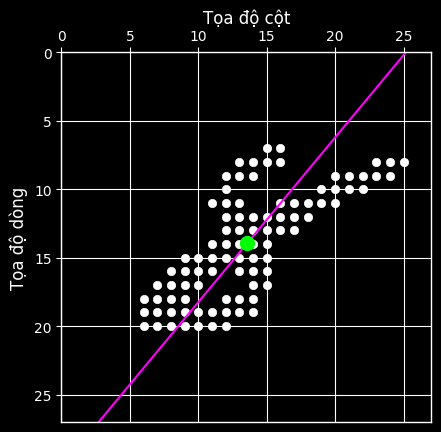

Trong hệ trục tọa độ dòng & cột (gốc tọa độ là ở góc trái trên), ta sẽ có các điểm dữ liệu màu trắng là tọa độ dòng và cột của các pixel của chữ số (chứ không phải của background). Ở đây, ta thống nhất: nếu giá trị pixel > 0.5 thì ta sẽ xem đây là pixel của chữ số. Tọa độ dòng và cột của điểm trọng tâm màu xanh chính là trung bình tọa độ dòng và cột của các điểm dữ liệu màu trắng! Còn đường thẳng màu tím thể hiện cho độ nghiêng chính là đường thẳng hồi qui có phương trình tọa-độ-cột = a * tọa-độ-dòng + b mà khớp nhất với các điểm dữ liệu màu trắng! (Nói thêm: mình có thử dùng đường thẳng có phương trình tọa-độ-dòng = a * tọa-độ-cột + b thì thấy đường tìm được không tốt bằng so với đường có phương trình tọa-độ-cột = a * tọa-độ-dòng + b). Tan của góc alpha mà ta cần tìm sẽ bằng -a (bạn suy nghĩ xem có đúng không). Trong trường hợp hồi qui đơn giản như này (tìm đường thẳng) thì người ta đã có công thức để có thể nhanh chóng tính a (còn nếu làm như HW1 thì sẽ phức tạp hơn):  \
a <font color=blue>=</font> hệ-số-tương-quan <font color=blue>*</font> độ-lệch-chuẩn-của-tọa-độ-cột-của-tất-cả-điểm-dữ-liệu <font color=blue>/</font> độ-lệch-chuẩn-của-tọa-độ-dòng-của-tất-cả-điểm-dữ-liệu \
với: \
hệ-số-tương-quan <font color=blue>=</font> trung bình của <font color=blue>(</font>tọa-độ-dòng-sau-khi-đã-chuẩn-hóa-của-điểm-dữ-liệu <font color=blue>\*</font> tọa-độ-cột-sau-khi-đã-chuẩn-hóa-của-điểm-dữ-liệu<font color=blue>)</font> \
với: \
tọa-độ-dòng-sau-khi-đã-chuẩn-hóa-của-điểm-dữ-liệu <font color=blue>=</font> <font color=blue>(</font>tọa-độ-dòng-ban-đầu-của-điểm-dữ-liệu <font color=blue>-</font> trung-bình-của-tọa-độ-dòng-của-tất-cả-điểm-dữ-liệu<font color=blue>)</font> <font color=blue>/</font> độ-lệch-chuẩn-của-tọa-độ-dòng-của-tất-cả-điểm-dữ-liệu \
tọa-độ-cột-sau-khi-đã-chuẩn-hóa-của-điểm-dữ-liệu <font color=blue>=</font> <font color=blue>(</font>tọa-độ-cột-ban-đầu-của-điểm-dữ-liệu <font color=blue>-</font> trung-bình-của-tọa-độ-cột-của-tất-cả-điểm-dữ-liệu<font color=blue>)</font> <font color=blue>/</font> độ-lệch-chuẩn-của-tọa-độ-cột-của-tất-cả-điểm-dữ-liệu

### Tiền xử lý dữ liệu huấn luyện

Hàm `deskew` để tạo ra các ảnh đã được loại bỏ độ nghiêng. Hàm `deskew` có tham số đầu vào là `X` --- mảng chứa các véc-tơ đầu vào (chưa thêm 1 ở đầu) ứng với các ảnh, mảng này có shape là `(N, d)` với `N` là số lượng các véc-tơ đầu vào (số lượng các ảnh) và `d` là số lượng phần tử của mỗi véc-tơ đầu vào (số lượng pixel của mỗi ảnh). Hàm `deskew` trả về mảng chứa các véc-tơ đầu vào ứng với các ảnh đã được loại bỏ độ nghiêng, mảng này có cùng shape với `X`.

Để đơn giản khi cài đặt thì mình cho phép bạn dùng vòng lặp để duyệt qua các ảnh trong `X`. Trước khi cài đặt hàm `deskew`, bạn nên code nháp trước với một ảnh và kiểm tra kết quả bằng mắt. Dưới đây là ảnh số 8 mà mình dùng trong các hình minh họa ở trên, bạn có thể làm nháp với ảnh này.

In [27]:
def deskew(X):
    # YOUR CODE HERE
    # raise NotImplementedError()
    O = np.zeros_like(X)
    X = X.reshape(X.shape[0],28,28)
    for i, Xi in enumerate(X):
        rr, cc = np.where(Xi>0.5) # Lấy ra tọa độ pixel của chữ số

        # Tính toán hệ số tương quan và tan của alpha
        s_rr, s_cc = (rr - rr.mean()) / rr.std(), (cc - cc.mean()) / cc.std()
        correlation_coefficient = np.mean(s_rr*s_cc)
        tan_alpha = -correlation_coefficient *cc.std()/rr.std()

        # Tạo mảng chứa các tọa độ dòng và cột của 1 bức ảnh (28,28)
        row_indices, col_indices = np.indices((Xi.shape[0],Xi.shape[1]))
        
        x = rr.mean() # Tính tọa độ dòng của điểm trọng tâm
        # Tính toán ic
        ic = col_indices + (x-row_indices)*tan_alpha
        ceil_ic = np.ceil(ic).astype(int)
        con = ceil_ic - ic
        ceil_ic = np.clip(ceil_ic,0,Xi.shape[0]-1)
        floor_ic = np.clip(np.floor(ic).astype(int),0,Xi.shape[0]-1)

        # Thực hiện loại bỏ độ nghiêng
        O[i] = (con * Xi[row_indices, floor_ic] + (1-con) * Xi[row_indices, ceil_ic]).reshape(1,28*28)
    return O

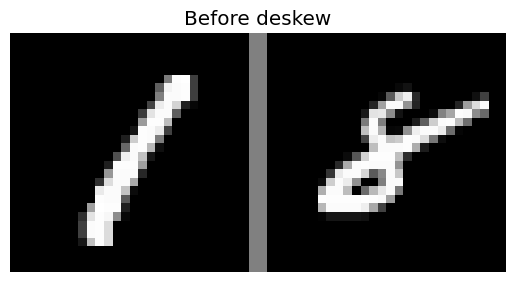

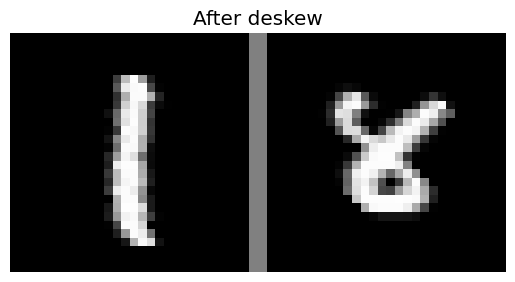

In [28]:
# TEST
X = train_X[[3, 41495]] 
Z = deskew(X)

canvas1 = 0.5 * np.ones((28, 28 + 2 + 28))
canvas1[0:28, 0:28] = X[0].reshape(28, 28)
canvas1[0:28, 28 + 2:28 + 2 + 28] = X[1].reshape(28, 28)
canvas2 = 0.5 * np.ones((28, 28 + 2 + 28))
canvas2[0:28, 0:28] = Z[0].reshape(28, 28)
canvas2[0:28, 28 + 2:28 + 2 + 28] = Z[1].reshape(28, 28)
plt.figure()
plt.imshow(canvas1, cmap='gray', vmin=0, vmax=1)
plt.title('Before deskew')
plt.axis('off')
plt.figure()
plt.imshow(canvas2, cmap='gray', vmin=0, vmax=1)
plt.title('After deskew')
plt.axis('off');

In [29]:
train_Z = add_ones(deskew(train_X))
train_Z.shape

(50000, 785)

### Tìm mô hình Softmax Regression từ dữ liệu huấn luyện

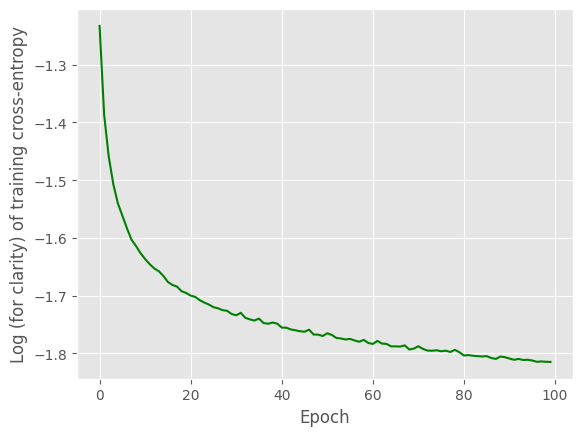

In [30]:
W_4, train_ces = train_smreg(
    train_Z, train_y, 
    initial_W=None, mb_size=32, lr=0.03, max_epoch=100, wanted_mbe=0)

plt.plot(np.log(train_ces), color='green')
plt.xlabel('Epoch')
plt.ylabel('Log (for clarity) of training cross-entropy');

### Dùng mô hình Softmax Regression tìm được để dự đoán với dữ liệu huấn luyện và đánh giá kết quả

In [31]:
predicted_train_y = compute_smreg_output(W_4, train_Z, return_prob=False)
train_mbe = compute_mbe(predicted_train_y, train_y)
train_mbe

4.7

Độ lỗi MBE trên dữ liệu huấn luyện giảm từ 6.x% xuống 4.x%! Xuất sắc!

### Tiền xử lý dữ liệu validation, dùng mô hình Softmax Regression tìm được để dự đoán với dữ liệu validation và đánh giá kết quả

In [32]:
val_Z = add_ones(deskew(val_X))
predicted_val_y = compute_smreg_output(W_4, val_Z, return_prob=False)
val_mbe = compute_mbe(predicted_val_y, val_y)
val_mbe

4.7

Độ lỗi MBE trên dữ liệu validation cũng giảm theo: từ 7.x% xuống 4.x%! Thật sự xuất sắc!

## Neural Network

### Tiền xử lý dữ liệu huấn luyện

In [33]:
train_Z = add_ones(train_X)
train_Z.shape

(50000, 785)

### Tìm mô hình Neural Network từ dữ liệu huấn luyện

Trong phần này, ta sẽ làm với một kiến trúc đơn giản của mô hình Neural Network: Fully-Connected Feed-Forward Neural Network. Ta sẽ dùng hàm kích hoạt sigmoid ở tầng ẩn và hàm softmax ở tầng đầu ra. Như vậy, có thể xem mô hình Neural Network của ta là mô hình Softmax Regression mà có véc-tơ đầu vào là $\textbf{z}$ với $\textbf{z}$ được tính từ véc-tơ đầu vào ban đầu $\textbf{x}$ thông qua các tầng ẩn. Ý tưởng lớn của mô hình Neural Network là mô hình sẽ tự động học luôn cách xác định véc-tơ đầu vào $\textbf{z}$ từ dữ liệu, thay vì con người phải ngồi suy nghĩ cách thiết kế $\textbf{z}$. Ưu điểm của cách làm này của mô hình Neural Network là con người có thể để cho máy tính chạy và đi uống coffee :-). Nhưng nhược điểm là mô hình sẽ có nhiều tham số (trọng số) cần phải học hơn, và do đó sẽ cần nhiều dữ liệu hơn để có thể học tốt; điều này cũng có nghĩa là sẽ cần máy tính mạnh hơn, huấn luyện lâu hơn, tốn tiền điện nhiều hơn, thải CO2 ra môi trường nhiều hơn :-(. Một nhược điểm nữa là con người có thể không hiểu được véc-tơ đầu vào $\textbf{z}$ mà mô hình đưa ra. Về độ chính xác dự đoán, cho đến thời điểm hiện tại mô hình Neural Network là mô hình đạt được độ chính xác dự đoán rất tốt với dữ liệu hình ảnh, âm thanh, văn bản.

Hàm `compute_nnet_output`. Hàm này sẽ được dùng trong hàm `train_nnet` ở bên dưới; ngoài ra, sau khi huấn luyện xong thì hàm này sẽ được dùng để dự đoán các đầu ra của các véc-tơ đầu vào mới.

Hàm `compute_nnet_output` có các tham số đầu vào:
- `Ws`: list chứa các mảng trọng số của mô hình Neural Network. `Ws[l-1]` là mảng trọng số của tầng `l` với `l` >= 1 (tầng 0 là tầng đầu vào, không có mảng trọng số); mảng trọng số của tầng `l` có shape là <font color=blue>(</font>1 + số lượng nơ-ron của tầng `l-1`<font color=blue>,</font> số lượng nơ-ron của tầng `l`<font color=blue>)</font> với "số lượng nơ-ron của tầng" là không tính nơ-ron mà luôn có giá trị đầu ra là 1
- `X`: mảng chứa các véc-tơ đầu vào cần dự đoán (đã được thêm 1 ở đầu), mảng này có shape là (`N`, `d+1`) với `N` là số lượng các véc-tơ đầu vào và `d` là số lượng phần tử của mỗi véc-tơ đầu vào (khi chưa thêm 1 ở đầu)
- `return_what`: nếu tham số này bằng `all` thì sẽ trả về list chứa các mảng-chứa-các-véc-tơ-đầu-ra ở tất cả các tầng (ta sẽ cần dùng list này trong quá trình huấn luyện); nếu tham số này bằng `prob` thì sẽ trả về mảng chứa các véc-tơ đầu ra ở tầng đầu ra, mỗi véc-tơ đầu ra cho biết xác suất các lớp của véc-tơ đầu vào tương ứng; nếu tham số này bằng `class` hoặc các giá trị khác thì sẽ trả về mảng chứa các lớp đầu ra dự đoán, lớp đầu ra dự đoán của một véc-tơ đầu vào là lớp mà có xác suất lớn nhất trong véc-tơ đầu ra chứa xác suất các lớp

Hàm `compute_nnet_output` sẽ trả về:

- Nếu `return_what` bằng `all` thì sẽ trả về list chứa các mảng-chứa-các-véc-tơ-đầu-ra ở tất cả các tầng, bao gồm cả tầng 0 (tầng đầu vào). Phần tử chỉ số `i` của list này là mảng chứa các véc-tơ đầu ra của tầng `i` tương ứng với các véc-tơ đầu vào của `X`; mảng này có shape là (`N`, 1 + số lượng nơ-ron của tầng `i`) nếu mảng này không phải là phần tử cuối của list ("1 + ..." là ứng với giá trị 1 của nơ-ron mà luôn có giá trị đầu ra là 1), còn nếu mảng này là phần tử cuối của list (tầng đầu ra) thì sẽ có shape là (`N`, số lượng nơ-ron của tầng `i`). Nhắc lại: "số lượng nơ-ron của tầng" là không tính nơ-ron mà luôn có giá trị đầu ra là 1, `N` là số lượng véc-tơ đầu vào của `X`
- Nếu `return_what` bằng `prob` thì sẽ trả về mảng chứa các véc-tơ đầu ra ở tầng đầu ra mà tương ứng với các véc-tơ đầu vào của `X`, mỗi véc-tơ đầu ra chứa xác suất các lớp của véc-tơ đầu vào tương ứng; mảng này có shape là (`N`, số lượng lớp)
- Nếu `return_what` bằng `class` hoặc các giá trị khác thì sẽ trả về mảng chứa các lớp đầu ra dự đoán tương ứng với các véc-tơ đầu vào của `X`, lớp đầu ra dự đoán của một véc-tơ đầu vào là lớp mà có xác suất lớn nhất trong véc-tơ đầu ra chứa xác suất các lớp; mảng này có shape là (`N`,)

Trong hàm `compute_nnet_output` thì bạn được phép dùng vòng lặp để duyệt qua các tầng.

In [34]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

def softmax(X):
    return np.exp(X)/(np.exp(X).sum(axis=1, keepdims=True))

def compute_nnet_output(Ws, X, return_what='class'):
    res = []
    res.append(X)
    for i in range(len(Ws)-1):
        res.append(add_ones(sigmoid(res[-1]@Ws[i])))
    res.append(softmax(res[-1]@Ws[-1]))
    if return_what == 'all':
        return res
    if return_what == 'prob':
        return res[-1]
    return np.argmax(res[-1], axis=1)

Hàm `train_nnet` để huấn luyện mô hình Neural Network với độ lỗi cross-entropy và thuật toán cực tiểu hóa SGD (Stochastic Gradient Descent).

Hàm `train_nnet` có các tham số đầu vào:
- `X`, `y`, `initial_Ws`, `mb_size`, `lr`, `max_epoch`: giống như ở HW3, mình sẽ không nhắc lại nữa. Một khác biệt nhỏ so với HW3 là `initial_W` được thay bằng `initial_Ws` (có s), vì bây giờ ta không chỉ có một mảng trọng số mà là một list các mảng trọng số. Ngoài ra, so với HW3 thì ở đây ta chỉ dùng `max_epoch` để ngắt SGD, chứ không có `wanted_mbe` (ở HW3, ta đưa thêm `wanted_mbe` chủ yếu là để so sánh GD và SGD)
- `hid_layer_sizes`: list cho biết số lượng nơ-ron của các tầng ẩn (không tính nơ-ron mà luôn có giá trị đầu ra là 1); ví dụ, list `[20, 10]` nghĩa là Neural Network của ta có 2 tầng ẩn, trong đó tầng ẩn thứ nhất có 20 nơ-ron, tầng ẩn thứ hai có 10 nơ-ron

Hàm `train_nnet` trả về:
- List chứa các mảng trọng số của mô hình Neural Network. Phần tử chỉ số `l-1` của list này là mảng trọng số của tầng `l` với `l` >= 1 (tầng 0 là tầng đầu vào, không có mảng trọng số); mảng trọng số của tầng `l` có shape là <font color=blue>(</font>1 + số lượng nơ-ron của tầng `l-1`<font color=blue>,</font> số lượng nơ-ron của tầng `l`<font color=blue>)</font> với "số lượng nơ-ron của tầng" là không tính nơ-ron mà luôn có giá trị đầu ra là 1
- List chứa độ lỗi cross-entropy trên dữ liệu huấn luyện sau mỗi epoch (giống HW3)

Như đã nói, để tìm các trọng số của mô hình Neural Network thì ta sẽ dùng thuật toán SGD để cực tiểu độ lỗi cross-entropy trên dữ liệu huấn luyện. Như vậy, về cơ bản là hàm `train_nnet` giống như hàm `train_smreg`. Có một điểm khác là ở mỗi mini-batch, ta không chỉ phải cập nhật cho các trọng số của mô hình Softmax Regression ứng với tầng đầu ra, mà còn phải cập nhật cho các trọng số của các tầng ẩn trước đó. 

Như đã biết, trong SGD, để cập nhật cho một trọng số thì ta cần tính trung bình trên mini-batch đạo hàm riêng của độ-lỗi-của-một-mẫu-dữ-liệu-huấn-luyện theo trọng số này. Xét trọng số nối từ nơ-ron i của tầng l-1 tới nơ-ron j của tầng l. Sau khi áp dụng "chain rule", ta có công thức để tính đạo hàm riêng của độ-lỗi-của-một-mẫu-dữ-liệu-huấn-luyện theo trọng số này:

Đạo hàm riêng <font color=blue>=</font> giá trị đầu ra của nơ-ron i ở tầng l-1 <font color=blue>*</font> delta của nơ-ron j ở tầng l

Với delta của một nơ-ron là đạo hàm riêng của độ-lỗi-của-một-mẫu-dữ-liệu-huấn-luyện theo tổng có trọng số (giá trị tính được ngay trước khi áp dụng hàm kích hoạt) của nơ-ron này.

Dưới đây là mã giả của thuật toán SGD để huấn luyện mô hình Neural Network.

===

Khởi tạo các trọng số (lưu ý: với Neural Network, cách khởi tạo trọng số sẽ ảnh hưởng nhiều đến kết quả tìm được bởi SGD)

Với mỗi epoch (một epoch ám chỉ một lần duyệt qua toàn bộ các mẫu dữ liệu huấn luyện):
- Xáo trộn ngẫu nhiên các mẫu dữ liệu huấn luyện
- Chia các mẫu dữ liệu huấn luyện ra thành các mini-batch có kích thước bằng nhau (kích thước này do người dùng chỉ định). Với mỗi mini-batch:
    1. Thực hiện lan truyền tiến các véc-tơ đầu vào qua Neural Network để có được các véc-tơ đầu ra ở tất cả các tầng
    2. Tính các véc-tơ delta của tầng cuối từ các véc-tơ đầu ra của tầng cuối (véc-tơ chứa xác suất các lớp) và các véc-tơ đầu ra đúng của mini-batch (véc-tơ one-hot) 
    3. Tính gradient (các đạo riêng) của tầng cuối từ các véc-tơ đầu ra của tầng kế cuối và các véc-tơ delta của tầng cuối
    4. Cập nhật các trọng số của tầng cuối dựa trên gradient
    5. Duyệt từ tầng kế cuối về đầu. Với tầng i:
        1. Tính các véc-tơ delta của tầng i từ các véc-tơ delta của tầng i+1, các trọng số của tầng i+1, và các véc-tơ đầu ra của tầng i
        2. Tính gradient (các đạo riêng) của tầng i từ các véc-tơ đầu ra của tầng i-1 và các véc-tơ delta của tầng i
        3. Cập nhật các trọng số của tầng i dựa trên gradient

===

In [35]:
def train_nnet(X, y, 
               hid_layer_sizes, 
               initial_Ws, mb_size, lr, max_epoch):
    # Cách để khởi tạo tốt các trọng số khá là "bí hiểm"
    # nên mình sẽ làm cho bạn ;-)
    np.random.seed(0) # Cố định sự ngẫu nhiên để mình và bạn sẽ ra cùng kết quả
    n_classes = len(np.unique(y)) 
    if initial_Ws is None:
        layer_sizes = [X.shape[1] - 1] + hid_layer_sizes + [n_classes]
        Ws = [np.random.randn(layer_sizes[i] + 1, layer_sizes[i + 1]) 
              / np.sqrt(layer_sizes[i] + 1) 
              for i in range(len(layer_sizes) - 1)] 
    else:
        Ws = initial_Ws
    y_one_hot = np.eye(n_classes)[y]
    train_ces = []
    random_index = np.arange(len(X)) # Tạo mảng chứa các chỉ số
    while(max_epoch): 
        np.random.shuffle(random_index)  # Xáo trộn ngẫu nhiên mảng các chỉ số ở mỗi epoch     
        for i in range(int(len(X)/mb_size)):    
            mb_index = random_index[i*mb_size: (i+1)*mb_size] # Lấy ra mảng các chỉ số cho từng mini batch
            X_mb, y_mb = X[mb_index], y_one_hot[mb_index] # Lấy ra các mini batch
            As = compute_nnet_output(Ws, X_mb, 'all') 
            delta = As[-1] - y_mb
            grad_L = (As[-2].T@delta)/mb_size
            Ws[-1] -= lr*grad_L
            for j in range(len(Ws)-2,-1,-1):
                delta = delta.dot(Ws[j+1].T[:,1:]) * As[j+1][:,1:] * (1 - As[j+1][:, 1:])
                grad_i = (As[j].T@delta)/mb_size
                Ws[j] -= lr*grad_i
        max_epoch -= 1
        epoch_predicted_Y = compute_nnet_output(Ws, X, 'prob') 
        train_ces.append(-((y_one_hot*np.log(epoch_predicted_Y)).sum())/len(y_one_hot))
    return Ws, train_ces

CPU times: total: 2min 33s
Wall time: 1min 31s


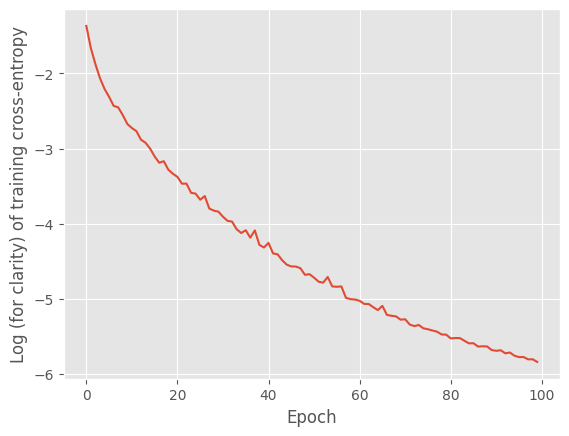

In [36]:
%%time
Ws_1, train_ces = train_nnet(
    train_Z, train_y,
    hid_layer_sizes=[50], 
    initial_Ws=None, mb_size=32, lr=0.3, max_epoch=100)
plt.plot(np.log(train_ces))
plt.xlabel('Epoch')
plt.ylabel('Log (for clarity) of training cross-entropy');

### Dùng mô hình Neural Network tìm được để dự đoán với dữ liệu huấn luyện và đánh giá kết quả

In [37]:
predicted_train_y = compute_nnet_output(Ws_1, train_Z, return_what='class')
train_mbe = compute_mbe(predicted_train_y, train_y)
train_mbe

0.002

Ở phần trước, độ lỗi MBE trên dữ liệu huấn luyện của mô hình Softmax Regression (cùng cách tiền xử lý) tốt nhất là 4.x%. Với mô hình Neural Network ở phần này, độ lỗi MBE trên dữ liệu huấn luyện đã giảm xuống 0.002% :-O.

Nhưng ta khoan hãy vui mừng, vì độ lỗi siêu thấp trên dữ liệu huấn luyện có thể là do "học vẹt". Ta hãy xem độ lỗi trên dữ liệu validation.

### Tiền xử lý dữ liệu validation, dùng mô hình Neural Network tìm được để dự đoán với dữ liệu validation và đánh giá kết quả

In [38]:
val_Z = add_ones(val_X)
predicted_val_y = compute_nnet_output(Ws_1, val_Z, return_what='class')
val_mbe = compute_mbe(predicted_val_y, val_y)
val_mbe.round(4)

2.89

## Cải tiến 4: $L^2$ Regularization (Cơ chế phạt chuẩn $L^2$)

Mô hình Neural Network hiện tại có độ lỗi trên dữ liệu huấn luyện nhỏ hơn khá nhiều so với độ lỗi trên dữ liệu validation (0.002% vs 2.89%). Đây là dấu hiệu cho thấy mô hình Neural Network hiện tại có thể đang bị "overfitting".

**$L^2$ Regularization (Cơ chế phạt chuẩn $L^2$)**

<u>**_Ý tưởng:_**</u>

Ý tưởng của cơ chế phạt tổng quát là thêm vào hàm mục tiêu $J$ một hàm phạt $\Omega(\mathbf{W})$ để giới hạn chuẩn của tham số $\mathbf{W}$. Ta có công thức như sau:
$$J_{reg}(\mathbf{W}; \mathbf{X}, \mathbf{y}) = J(\mathbf{W};\mathbf{X}, \mathbf{y}) + \alpha\Omega(\mathbf{W})$$

Trong đó, $\alpha \in [0,\infty)$ là siêu tham số xác định mức độ đóng góp của hạng tử phạt chuẩn $\Omega$ so với hàm mục tiêu $J$. Giá trị của $\alpha$ được gán bằng $0$ đồng nghĩa với việc không có bất kì sự kiểm soát nào với hàm mục tiêu. Giá trị $\alpha$ càng lớn thì mức độ kiểm soát càng cao.

Hàm phạt chuẩn $L^2$ (hay còn gọi là suy giảm trọng số - weight decay) là một trong những dạng phạt chuẩn đơn giản và phổ biến nhất. Chiến lược kiểm soát này hướng trọng số về gần gốc tọa độ bằng cách thêm vào hàm mục tiêu hạng tử kiểm soát $\Omega(\mathbf{W}) = \frac{1}{2}\|\mathbf{\mathbf{W}}\|^2_2$

Mô hình trên có hàm mục tiêu:
$$J_{reg}(\mathbf{W};\mathbf{X}, \mathbf{y}) = \frac{\alpha}{2}\mathbf{W}^{T}\mathbf{W} + J(\mathbf{W};\mathbf{X}, \mathbf{y})$$

với đạo hàm theo tham số $\mathbf{W}$ là:
$$\nabla_{\mathbf{W}}J_{reg}(\mathbf{W};\mathbf{X}, \mathbf{y}) = \alpha \mathbf{W} + \nabla_{\mathbf{W}}J(\mathbf{W};\mathbf{X}, \mathbf{y})$$

Với $\epsilon$ là learning rate, ta cập nhật tham số bằng một bước nhảy đạo hàm (đối với Mini Batch Gradient Descent) theo công thức sau:
$$\mathbf{W} \leftarrow \mathbf{W} - \frac{\epsilon}{B}\sum_{𝑛=(𝑏−1)𝐵+1}^{bB}(\alpha \mathbf{W} + \nabla_{\mathbf{W}}J(\mathbf{W};\mathbf{X}^{(n)}, \mathbf{y}^{(n)}))$$

<u>_**Regularization giúp chống "overfitting" vì:**_</u>

- Khi thuật toán huấn luyện cố gắng cực tiểu hóa hàm mục tiêu có kiểm soát $J_{reg}$, nó cùng lúc làm giảm giá trị của cả hàm mục tiêu gốc $J$ và độ lớn của tham số $\mathbf{W}$. Cách chọn loại chuẩn $\Omega$ khác nhau dẫn tới các kết quả khác nhau.
- Đối với $L^2$ Regularization, việc tối thiểu hạng tử kiểm soát $\Omega(\mathbf{W}) = \frac{1}{2}\|\mathbf{\mathbf{W}}\|^2_2$ đồng nghĩa với việc khiến cho các giá trị của hệ số $\mathbf{W}$ trở nên nhỏ gần với 0 (về gần gốc tọa độ). Giúp cho nhiều hệ số trong các ma trận trọng số là nhỏ. Điều này tương ứng với việc số lượng các neuron hoạt động là nhỏ, cũng giúp cho Neural Network tránh được hiện tượng overfitting.

_**Nguồn tham khảo:**_ Deep Learning (Ian J. Goodfellow, Yoshua Bengio and Aaron Courville), MIT Press, 2016.

### Tiền xử lý dữ liệu huấn luyện

In [39]:
train_Z = add_ones(deskew(train_X))
train_Z.shape

(50000, 785)

### Tìm mô hình Neural Network từ dữ liệu huấn luyện

In [40]:
def train_nnet_l2_reg(X, y, 
               hid_layer_sizes, 
               initial_Ws, mb_size, lr, alpha, max_epoch):
    np.random.seed(0) 
    n_classes = len(np.unique(y)) 
    if initial_Ws is None:
        layer_sizes = [X.shape[1] - 1] + hid_layer_sizes + [n_classes]
        Ws = [np.random.randn(layer_sizes[i] + 1, layer_sizes[i + 1]) 
              / np.sqrt(layer_sizes[i] + 1) 
              for i in range(len(layer_sizes) - 1)] 
    else:
        Ws = initial_Ws
    y_one_hot = np.eye(n_classes)[y]
    train_ces = []
    random_index = np.arange(len(X))
    while(max_epoch): 
        np.random.shuffle(random_index)  
        for i in range(int(len(X)/mb_size)):    
            mb_index = random_index[i*mb_size: (i+1)*mb_size] 
            X_mb, y_mb = X[mb_index], y_one_hot[mb_index] 
            As = compute_nnet_output(Ws, X_mb, 'all') 
            delta = As[-1] - y_mb
            grad_L = As[-2].T@delta
            Ws[-1] -= (lr/mb_size)*(alpha*Ws[-1] + grad_L)
            for j in range(len(Ws)-2,-1,-1):
                delta = delta.dot(Ws[j+1].T[:,1:]) * As[j+1][:,1:] * (1 - As[j+1][:, 1:])
                grad_i = As[j].T@delta
                Ws[j] -= (lr/mb_size)*(alpha*Ws[j] + grad_i)
        max_epoch -= 1
        epoch_predicted_Y = compute_nnet_output(Ws, X, 'prob') 
        train_ces.append(-((y_one_hot*np.log(epoch_predicted_Y)).sum())/len(y_one_hot))
    return Ws, train_ces

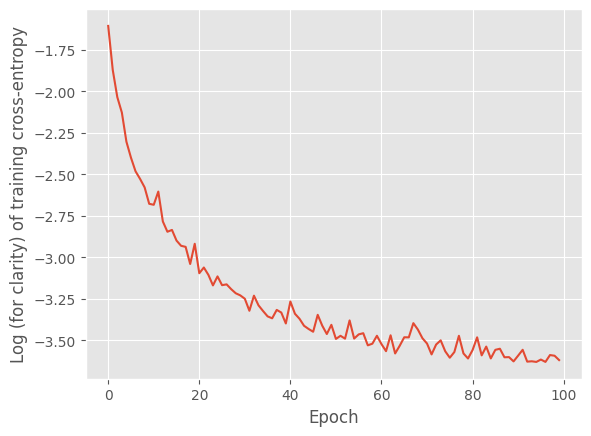

In [41]:
Ws_2, train_ces = train_nnet_l2_reg(train_Z, train_y,
                                    hid_layer_sizes=[50], 
                                    initial_Ws=None, mb_size=32, lr=0.3, alpha=0.002, max_epoch=100)
plt.plot(np.log(train_ces))
plt.xlabel('Epoch')
plt.ylabel('Log (for clarity) of training cross-entropy')
plt.show()

### Dùng mô hình Neural Network tìm được để dự đoán với dữ liệu huấn luyện và đánh giá kết quả

In [42]:
predicted_train_y = compute_nnet_output(Ws_2, train_Z, return_what='class')
train_mbe = compute_mbe(predicted_train_y, train_y)
train_mbe.round(4)

0.458

### Tiền xử lý dữ liệu validation, dùng mô hình Neural Network tìm được để dự đoán với dữ liệu validation và đánh giá kết quả

In [43]:
val_Z = add_ones(deskew(val_X))
predicted_val_y = compute_nnet_output(Ws_2, val_Z, return_what='class')
val_mbe = compute_mbe(predicted_val_y, val_y)
val_mbe.round(4)

1.89

## Chọn ra cách tiền xử lý + mô hình Neural Network sau cùng là cách tiền xử lý + mô hình Neural Network mà có độ lỗi dự đoán thấp nhất trên dữ liệu validation

Như vậy, ta sẽ chọn mô hình Neural Network áp dụng chiến lược $L^2$ Regularization có bộ trọng số `Ws_2`, với hàm `deskew` để tiền xử lí dữ liệu

## Dùng cách tiền xử lý + mô hình Neural Network sau cùng để đi thi thật!

In [44]:
test_Z = add_ones(deskew(test_X))
predicted_test_y = compute_nnet_output(Ws_2, test_Z, return_what='class')
test_mbe = compute_mbe(predicted_test_y, test_y)
test_mbe.round(4)

1.84